In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install flask-ngrok

In [ ]:
dataset = pd.read_csv('/content/drive/My Drive/ML/iris.csv')

dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
Y = dataset['Species'] # Target prediksi
x = dataset.drop(['Id', 'Species'], axis=1) # Data Id tidak diperlukan

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
X = scaler.transform(x)
#data_x = pd.DataFrame(X, columns=x.columns)

In [ ]:
import pickle

filename_scaler = 'scaler.pkl' # Nama yang digunakan bebas
pickle.dump(scaler, open(filename_scaler, 'wb')) # Membuat file model, ganti logreg dengan nama model yang digunakan

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, precision_score, recall_score

In [ ]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)

In [ ]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test))) # .score() -> Accuracy
print(f1_score(y_test, y_pred, average='macro'))
print(precision_score(y_test, y_pred, average='macro'))
print(recall_score(y_test, y_pred, average='macro'))

Accuracy of logistic regression classifier on test set: 0.96
0.9547511312217193
0.9523809523809524
0.9629629629629629


In [ ]:
import pickle

In [ ]:
filename_data = 'iris.pkl' # Nama yang digunakan bebas
pickle.dump(logreg, open(filename_data, 'wb')) # Membuat file model, ganti logreg dengan nama model yang digunakan

In [ ]:
from flask_ngrok import run_with_ngrok
from flask import Flask

In [ ]:
app = Flask(__name__) # Membuat sebuah object Flask

@app.route("/home")
def home():
    return "<h1>Running Flask on Google Colab!</h1>"

In [ ]:
from flask import jsonify, request

In [ ]:
@app.route('/classify', methods=['POST'])
def classification():
  sepal_width = float(request.json['sepal_width'])
  sepal_length = float(request.json['sepal_length'])
  petal_length = float(request.json['petal_length'])
  petal_width = float(request.json['petal_width'])

  model = pickle.load(open('iris.pkl', 'rb'))
  scale = pickle.load(open('scaler.pkl', 'rb'))

  data = [[sepal_width, sepal_length, petal_length, petal_width]]
  data1 = scale.transform(data)
  y_pred_loaded = model.predict(data1)

  return jsonify({
      "output": y_pred_loaded[0]
  })

In [ ]:
run_with_ngrok(app)

app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://3c5483cacc34.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


127.0.0.1 - - [07/Oct/2020 02:27:18] "POST /classify HTTP/1.1" 200 -


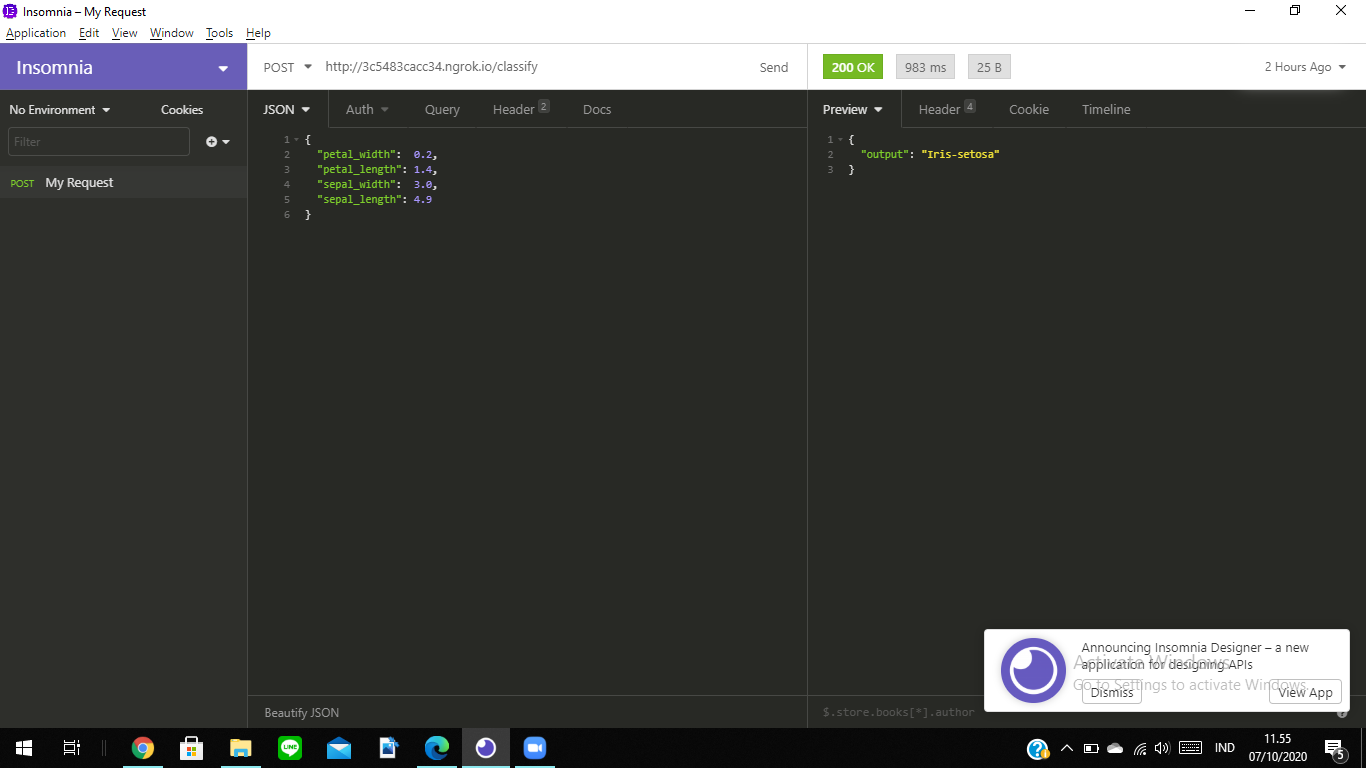